In [7]:
%matplotlib inline  
#!/usr/bin/python
import numpy
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.animation import ArtistAnimation

t (msec),voltage (mV)


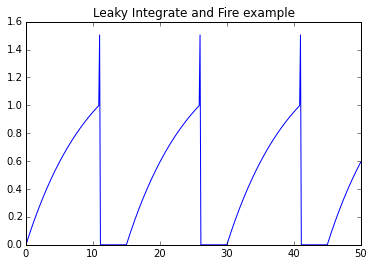

In [12]:
# dV/dt = 1/tau_m * (-V + I*Rm)
T = 50       # total time to simulate (msec)
dt = 0.125 # simulation time step (msec)
time = numpy.arange(0, T + dt, dt) # time array
t_rest = 0 # initial refractory time

# LIF Properties

Vm = numpy.zeros(len(time)) # potential (V) trace over time
Rm = 1                  # resistance (kOhm)
Cm = 10                   # Capacicante (uF)
tau_m = Rm * Cm        # time constant (msec)
tau_ref = 4           # refractory period (msec)
Vth = 1            # spike threshold (V)
V_spike = 0.5      # spike delta (V)

# Stimulus
I = 1.5        # Input current (A)

# Iterate over each time step
print "t (msec),voltage (mV)"
for i, t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref
        #print str(t) + ", " + str(Vm[i])

# Plot membrane potential trace
plt.figure()
plt.plot(time, Vm)
plt.title('Leaky Integrate and Fire example')
plt.show()

/Users/RichardChen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
/Users/RichardChen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/Users/RichardChen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/RichardChen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


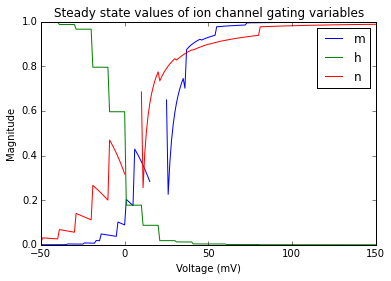

In [13]:
# Potassium (K) Channel
alphaN = np.vectorize(lambda v: 0.01*(10 - v) / (np.exp((10-v)/10) - 1) if v != 10 else 0.1)
betaN  = lambda v: 0.125 * np.exp(-v/80)
nInf   = lambda v: alphaN(v)/(alphaN(v) + betaN(v))

# Sodium (Na) Channel (activating)
alphaM = np.vectorize(lambda v: 0.1*(25-v) / (np.exp((25-v)/10) - 1) if v!= 25 else 1)
betaM = lambda v: 4 * np.exp(-v/18)
mInf = lambda v: alphaM(v)/(alphaM(v) + betaM(v))

# Sodium (Na) Channel (inactivating)
alphaH = lambda v: 0.07 * np.exp(-v/20)
betaH  = lambda v: 1/(np.exp((30-v)/10) + 1)
hInf   = lambda v: alphaH(v)/(alphaH(v) + betaH(v))

# Channel Activity
v = np.arange(-50, 151) # millivolts
plt.figure()
plt.plot(v, mInf(v), v, hInf(v), v, nInf(v))
plt.legend(('m', 'h', 'n'))
plt.title('Steady state values of ion channel gating variables')
plt.ylabel('Magnitude')
plt.xlabel('Voltage (mV)')

Time: 0.625, Saving frame 25
Time: 1.25, Saving frame 50
Time: 1.875, Saving frame 75
Time: 2.5, Saving frame 100
Time: 3.125, Saving frame 125
Time: 3.75, Saving frame 150
Time: 4.375, Saving frame 175
Time: 5.0, Saving frame 200
Time: 5.625, Saving frame 225
Time: 6.25, Saving frame 250
Time: 6.875, Saving frame 275
Time: 7.5, Saving frame 300
Time: 8.125, Saving frame 325
Time: 8.75, Saving frame 350
Time: 9.375, Saving frame 375
Time: 10.0, Saving frame 400
Time: 10.625, Saving frame 425
Time: 11.25, Saving frame 450
Time: 11.875, Saving frame 475
Time: 12.5, Saving frame 500
Time: 13.125, Saving frame 525
Time: 13.75, Saving frame 550
Time: 14.375, Saving frame 575
Time: 15.0, Saving frame 600
Time: 15.625, Saving frame 625
Time: 16.25, Saving frame 650
Time: 16.875, Saving frame 675
Time: 17.5, Saving frame 700
Time: 18.125, Saving frame 725
Time: 18.75, Saving frame 750
Time: 19.375, Saving frame 775
Time: 20.0, Saving frame 800
Time: 20.625, Saving frame 825
Time: 21.25, Saving

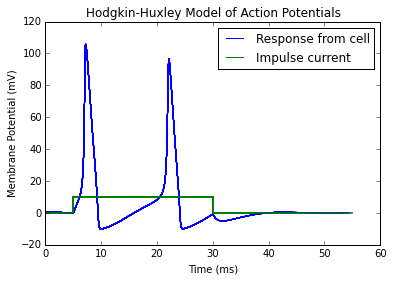

In [16]:
# Setup parameters and state variables
T    = 55    # ms
dt   = 0.025 # ms
timeLine = np.arange(0, T+dt, dt)

# Hodgkin-Huxley Parametahs (from the papah!)
restingVoltage     = 0      # V_rest (mv)
Cm                 = 1      # uF/cm2
gBarNa             = 120    # mS/cm2
gBarK              = 36     # mS/cm2
gBarL              = 0.3    # mS/cm2
sodiumPotential    = 115    # mV
potassiumPotential = -12    # mv
leakagePotential   = 10.613 # mV

Vm    = np.zeros(len(timeLine)) # The membrane potential we wanna find
Vm[0] = restingVoltage
m     = mInf(restingVoltage)
h     = hInf(restingVoltage)
n     = nInf(restingVoltage)

# Current Stimulus
# This is like a pulse
I = np.zeros(len(timeLine))
for i, t in enumerate(timeLine):
    if 5 <= t <= 30:
        I[i] = 10 # uA/cm2

# Main loop
animationFigure = pylab.figure()
images = []
for i in range(1, len(timeLine)):
    sodiumConductance    = gBarNa * (m**3) * h
    potassiumConductance = gBarK  * (n**4)
    leakageConductance   = gBarL

    # integrate the equations on m, h, and n
    m += (alphaM(Vm[i-1]) * (1 - m) - betaM(Vm[i-1])*m) * dt
    h += (alphaH(Vm[i-1]) * (1 - h) - betaH(Vm[i-1])*h) * dt
    n += (alphaN(Vm[i-1]) * (1 - n) - betaN(Vm[i-1])*n) * dt

    # now integrate the changes in V
    sodiumCurrent = sodiumConductance * (Vm[i-1] - sodiumPotential)
    potassiumCurrent = potassiumConductance * (Vm[i-1] - potassiumPotential)
    leakageCurrent = leakageConductance * (Vm[i-1] - leakagePotential)
    Vm[i] = Vm[i-1] + (I[i-1] - sodiumCurrent - potassiumCurrent - leakageCurrent) * dt / Cm

    # update status
    if i % 25 == 0:
        # update status every 25 frames (about a second of video).
        # don't wanna print a lot cuz it slows things down
        print "Time: " + str(i*dt) + ", Saving frame " + str(i)

        # plot a frame of the graph
        voltageLine, currentLine = plt.plot(timeLine[:i+1], Vm[:i+1], 'b-', timeLine[:i+1], I[:i+1], 'g-')
        plt.legend([voltageLine, currentLine], ["Response from cell", "Impulse current"])
        plt.title('Hodgkin-Huxley Model of Action Potentials')
        plt.ylabel('Membrane Potential (mV)')
        plt.xlabel('Time (ms)')
        images.append((voltageLine, currentLine))